# A Bayesian approach to model 'fitting'
### August George - 11/2020
#### Zuckerman Lab - OHSU

These notes were prepared for a class presentation. You will need install the pyMC3 and arviz python libraries to run it.  

## Introduction:

Here we investigate Bayesian inference by using a familiar linear model with noise. Given the uncertainty of the data, we would like to estimate a distribution for each model parameter (e.g. slope, intercept). In Bayesian terms we want the posterior - the conditional probability of the model parameters given the data. 

In this notebook we introduce the basic concepts of Bayes' theorem, and Markov Chain Monte Carlo sampling. We analyze and compare the posterior distributions over a range of conditions for a linear model such as different data set changes. Finally, we examine the credible regions over a range of conditions. 

In [ ]:
from IPython.display import Image
Image(filename="linear_model.png", width = 400, height = 400)

## Motivation:

Suppose we do an experiment and observe the data above. What model do we expect? How can we find the slope and intercept? Also, how can we characterize the variance in the data?

One common method is linear regression:

+ Provides a *point estimate* of the best fit for the parameters (e.g. maximum likelihood estimation)

An alternative is Bayesian inference:

+ Provides a *distribution* for each model parameter given the data

## Bayes' Theorem:

Bayesian inference is based on Bayes' theorem. Below is a brief explanation to provide intuition on Bayes' theorem. 

In [ ]:
Image(filename="bayes_1.png", width = 400, height = 400)

Suppose there are two events, A, and B, and the probability of either event occuring is P(A) and P(B) respectively. Each circle represents the total probability of event A or B occuring. 

In [ ]:
Image(filename="bayes_2.png", width = 400, height = 400)

What is the probability of event 'A' happening, given the event B has happened? 

Since event B happened we are constrainted to the red 'B' circle on the right. The probability that event 'A' happened is the intersection between the 'A' and 'B' circles. The probability that event 'A' happened given event 'B' happened is then the ratio of the intersection of 'A' and 'B', to the total probability of 'B'

More formally: $P(A|B) = \dfrac{P(A\cap B)}{P(B)}$

Similarly for the probabilty of event 'B' happening given event 'A' happened: $P(B|A) = \dfrac{P(A\cap B)}{P(A)}$

Since both the above equations have the 'intersection' term, we can set them equal to eachother to find the common form of Bayes' theorem:

$P(A|B) = \dfrac{P(A\cap B)}{P(B)}  \longrightarrow P(A\cap B) = P(A|B) \cdot P(B)$ 

*and*

$P(B|A) = \dfrac{P(A\cap B)}{P(A)}  \longrightarrow P(A\cap B) = P(B|A) \cdot P(A)$

$ \Rightarrow $ **Bayes' Theorem:** $P(B|A) = \dfrac{P(A|B) \cdot P(B)}{P(A)}$

#### Bayes' theorem using distributions:


Instead of using point estimates, we can reforumlate Bayes' theorem using probability distributions:

$p(\theta | \mathrm{data}) = \dfrac{\mathcal{p}(\mathrm{data} | \theta ) \cdot p(\theta)}{p(\mathrm{data})}$


These dsitributions are commonly refered to as: $posterior = \dfrac{likelihood \cdot prior}{evidence}$

**posterior**, $p(\theta | \mathrm{data})$: probability distribution of the model parameters given the data set

**likelihood**, $\mathcal{p}(\mathrm{data} | \theta )$: probability distribution of the data given a set of parameters

**prior**, $p(\theta)$: probability distribution of the parameters - before using the data

**evidence**, $p(\mathrm{data})$: probability distribution of the data - before using the parameters

## Model 'fitting' w/ Bayes' Theorem

We want to find the posterior, the *distribution* of parameters given the data set. 

Calculating this directly is often difficult because of the evidence term:
$p(\mathrm{data}) = {\displaystyle \int_{\theta}^{} p(\mathrm{data} | \theta ) p(\theta)  \ \mathrm{d}\theta }$

The evidence distribution is a normalization term, so we can omit it and rewrite Bayes' theorem using a proportionalilty constant

**Bayes' Theorem:** $p(\theta | \mathrm{data}) \propto p(\mathrm{data} | \theta ) \cdot p(\theta)$

#### Markov chain Monte Carlo (MCMC)

One way to find the posterior is to use Markov Chain Monte Carlo sampling

Here the approach is to generate a Markov chain with a stationary (equilibrium) distribution that is proportional to the desired (i.e. $p(\theta | \mathrm{data})$) distribution. 

With enough samples, this Markov chain will also be proportional to the desired distribution. 

A common method for this is the random walk Metropolis-Hastings algorithm.

### Random walk Metropolis-Hastings Monte Carlo 


1. Intialization: Choose initial $\theta_{t=0}$ 
2. For $t = 1,...,m$:  
    1. Select canditate $\theta^{*}$ from a symmetric (e.g. Gaussian) distribution: $q(\theta^{*}|\theta_{t-1})$
    2. Calculate acceptance ratio: $\alpha = \dfrac{p(\mathrm{data} | \theta^{*} ) \cdot p(\theta^{*})}{p(\mathrm{data} | \theta_{t-1} ) \cdot p(\theta_{t-1})}$
    3. For $\alpha \geq 1$:
        1. accept candidate: $\theta_{t} \leftarrow \theta^*$
       
       For  $0 < \alpha < 1$:
        1. accept candidate: $\theta_{t} \leftarrow \theta^*$ with probability $\alpha$
        2. reject candidate: $\theta_{t} \leftarrow \theta_{t-1}$ with probability $1-\alpha$

### Useful definitions:

##### Gaussian (Normal) distribution: $p(x) = \dfrac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 }$

# Linear model example

In [ ]:
Image(filename="linear_model.png", width = 400, height = 400)

We want to find the model parameters that best fit the observed data. Let's assume a Gaussian distribution for the noise with a mean of zero and constant variance. For a linear model with this noise distribution we will need to find the posterior distribution for the slope, intercept, and noise variance.

Assumed model: $y_{i} = (ax_{i} + b) + \epsilon_{i}$, 

where $\epsilon$ is drawn from a Normal distribution: $N(\mu_{\epsilon}=0, \sigma_{\epsilon}=\sigma_{\mathrm{True}})$.

Parameters we want to estimate, $\theta = (a, b, \sigma_{\mathrm{True}})$

To use the Markov Chain Monte Carlo sampling we will need to guess a prior and calculate the likelihood. Let's assume Guassian priors for each parameter. The likelihood is calculated by combining the probabilities of each observed datapoint values and the estimated parameter values. In this example the liklihood is calculated from a Gaussian distribution with a mean of the estimated output (i.e. $ax_{i}+b$) and variance. 

Priors: Choose distributions, $p(\theta) = p(a)\cdot p(b) \cdot p(\sigma_{\epsilon})$ 

Likelihood: $p(\mathrm{data} | \theta ) = p(y | (a,b,\sigma_{\epsilon}) )$ 
$ = \prod_{i} p(y_{i} | (a,b,\sigma_{\epsilon}) = \prod_{i} \dfrac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{y_{i}-(ax_{i}+b)}{\sigma}\right)^2 }$


## Code example - intial linear model:

To demonstrate Bayesian inference we use Python with the pyMC3 library using a Markov Chain Monte Carlo sampler - NUTS.  

For the initial simulation we generate the data using 200 data points, a *slope* of 4, *intercept* of 2, and *standard deviation* of 0.5 for the Gaussian noise ( mean of zero). 

We first use a 'Normal' set of prior distributions:

$p(a) = p(b) = N(\mu=0, \sigma=20)$

$p(\sigma) = logN(\mu=0, \sigma=20)$


For reference:
**pyMC3 code example ** https://docs.pymc.io/notebooks/GLM-linear.html

In [ ]:
### Import libraries
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from pymc3 import  *
import warnings
warnings.filterwarnings('ignore')


### Set display options
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

In [ ]:
def generate_data(slope=4, intercept=2, sigma=0.5, data_size=200):
    
    ### True parameters for linear model
    true_slope = slope    
    true_intercept = intercept
    true_sigma = sigma

    ### Generate synthetic data 
    size = data_size
    x = np.linspace(0, 1, size)
    true_regression_line = true_intercept + true_slope * x  # y = a + b*x
    y = true_regression_line + np.random.normal(scale=true_sigma, size=size)  # add noise
    return (x,y,true_regression_line)

In [ ]:
def sampler(x,y, prior = 'normal', n_samples=200, chains=3, v=True):
    
    ### Construct model using pyMC3
    with Model() as model: 

        ### Define priors
        if prior == 'normal':
            sigma = Lognormal('sigma', 0, sigma=20)
            Intercept = Normal('Intercept', 0, sigma=20)
            x_coeff = Normal('slope', 0, sigma=20)
        elif prior == 'uniform':
            sigma = Uniform('sigma', 0,1)
            Intercept = Uniform('Intercept',-5, 5)
            x_coeff = Uniform('slope', -5, 5)
            
        ### Define likelihood
        likelihood = Normal('y', mu=Intercept + x_coeff * x,
                            sigma=sigma, observed=y)
        ### Inference
        if v:  # show progress bar
            trace = sample(n_samples, chains=chains, tune=2000) # draw posterior samples using NUTS 
        else: 
            trace = sample(n_samples, chains=chains, tune=2000, progressbar=False) # draw posterior samples using NUTS 
        
    return trace

In [ ]:
# Linear model (example 1) 
# data points = 200, slope = 4, intercept = 2, sigma = 0.5, prior -> normal distributions

x,y,y_true = generate_data()
trace = sampler(x,y, chains = 3)

In [ ]:
### Plot linear model w/ data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Data and underlying model')
ax.plot(x, y, 'x', label='data');
ax.plot(x, y_true, label='true linear model', lw=2.);
plt.legend(loc=0);

### MCMC Traces

Below we trace the (marginal) posterior distributions (left) and MCMC parameter values (right) for each parameter using three chains.

The mean for intercept, slope, and sigma posterior distributions are near the true values of 2, 4, and 0.5 respectively. 

The MCMC parameter values are stable over the course of the sampling - suggesting that it is indeed a stationary distribution. 

In [ ]:
### Plot traces
plt.figure(figsize=(7, 7))
az.plot_trace(trace);
plt.tight_layout();

## Posterior distributions with 95% high density interval (credible region)

Below we plot the (marginal) posterior distributions for the intercept, slope, and sigma for a single chain with the mean and 95% high density interval (~credible region).

In [ ]:
### Plot posterior w/ credible region
plt.figure(figsize=(7, 7))
az.plot_posterior(trace, hdi_prob=0.95);
plt.tight_layout();

In [ ]:
### function to graph different models together for comparison

def graph_comparisons(traces, m_names, p_names=['sigma', 'Intercept', 'slope']):       
    for i in range(len(p_names)):
        plt.figure(figsize=(7, 7)) 
        ax = az.plot_forest(traces,  
                    kind='ridgeplot',
                    var_names=p_names[i],
                    model_names = m_names,
                    combined=True,
                    ridgeplot_overlap=5,
                    ridgeplot_truncate=False,
                    hdi_prob = 0.95,
                    ridgeplot_quantiles = [.25,.5,.75],
                    colors=['blue', 'red', 'green'])        
        plt.tight_layout();
        ax[0].set_title('Comparing posterior distributions')

## Altering the standard deviation of the observed data

How do the posterior distributions change if the observed data has more or less variance? 

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with different sigmas (0.5, 1.0, 2.0). The posteriors are then plotted for comparision. As expected, posterior distributions 'flatten' and become less informative as the variance of the data increases. 

In [ ]:
### more examples - comparing posteriors for different sigma values

sigmas = [0.5, 1, 2]
m_names = ['sigma = 0.5', 'sigma = 1.0', 'sigma = 2.0']
traces = []

for i in range(len(sigmas)):
    x,y,y_true = generate_data(sigma=sigmas[i])
    trace = sampler(x,y, chains = 1)
    traces.append(trace)
   
graph_comparisons(traces,m_names)    

## Altering the amount of data

How do the posterior distributions change for different dataset sizes?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with different dataset sizes (10, 100, 200). The posteriors are then plotted for comparision. As expected, posterior distributions 'flatten' and become less informative as the amount of data decreases. 

In [ ]:
### more examples - comparing posteriors for different data sizes

data_size = [10, 100, 200]
m_names = ['n = 10', 'n = 100', 'n = 200']
traces = []

for i in range(len(data_size)):
    x,y,y_true = generate_data(data_size=data_size[i])
    trace = sampler(x,y, chains = 1)
    traces.append(trace)
   
graph_comparisons(traces,m_names)   



## Altering the prior distributions

How do the posterior distributions change for different prior distributions - in the low data regime?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with a small dataset (n=10) and with different prior distribution sets, the 'Normal' priors described above, and 'Uniform' priors:

$p(a) = p(b) = \mathrm{Uniform}(-5,5)$

$p(\sigma) = \mathrm{Uniform}(0,1)$

The posteriors are then plotted for comparision. As expected, in the low data regime the choice of prior significantly alters the posterior distribution. So, when using a small amount of data, the priors should be chosen carefully. 

In [ ]:
### more examples - comparing posteriors for different prior distributions, low data regime

m_names = ['uniform', 'normal']
traces = []

for i in range(len(m_names)):
    x,y,y_true = generate_data(data_size=10)
    trace = sampler(x,y, chains = 1, prior = m_names[i])
    traces.append(trace)
   
graph_comparisons(traces,m_names)  



## Altering the prior distributions - large dataset

How do the posterior distributions change for different prior distributions - with a large dataset?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with a large dataset (n=200) and with different prior distribution sets, the 'Normal' priors described above, and 'Uniform' priors:

$p(a) = p(b) = \mathrm{Uniform}(-5,5)$

$p(\sigma) = \mathrm{Uniform}(0,1)$

The posteriors are then plotted for comparision. As expected, with a large dataset the choice of prior has less of an effect on the posterior distributions - although there still is a small difference in the posteriors.

In [ ]:
### more examples - comparing posteriors for different prior distributions, large data regime

m_names = ['uniform', 'normal']
traces = []

for i in range(len(m_names)):
    x,y,y_true = generate_data(data_size=500)
    trace = sampler(x,y, chains = 1, prior = m_names[i])
    traces.append(trace)
   
graph_comparisons(traces,m_names)  

## Investigating the credible region

How 'accurate' are the credible regions? How well does the observed coverage match the ideal credible region? 

We expect the correct value to be in a 95% credible region 95% of the time, but is this actually the case in the limit of a finite amount of data?

Here we perform several trials generating several posteriors for the initial linear model described above and calculate how many times the true value is in the credible region, for a range of credible regions (i.e. %5, 15%...95%). 

This is done for a) a large dataset (n = 200), b) a small dataset (n = 10) with Normal priors described above, and c) a small dataset (n=10) with Uniform priors described above.

The results indicate that for 100 trials there is not much of a difference between the observed coverage and the ideal credible region for the large dataset. Using a small dataset and different priors had a similar result. 

This suggests that the credible regions are fairly robust over different dataset sizes and prior distributions choices. 

In [ ]:
### Verifying credible regions - how well does the observed coverage match the ideal credible region?

# hide output messages from pymc3 (caution: can also hide warnings)
import logging, sys
logging.disable(sys.maxsize)


### go through different credible regions (i.e. 5%,15%...95%) and calculate the observed 'covereage' 
def verify_cr(p):  # p = [n iter, data size, prior dist.]
        
    regions = [(i*10 + 5)/100 for i in range(10)]
    results = []
    a = 4 
    b = 2
    s = 0.5

    a_count = [0 for i in range(len(regions))]
    b_count = [0 for i in range(len(regions))]
    s_count = [0 for i in range(len(regions))]
    n = p[0]

    for i in range(n):

        if i%10 == 0:
            print(f'iteration {i}')

        ### generate dataset: slope = 4, intercept = 2, sigma = 0.5
        ### user parameters for data size and prior dist.
        
        x,y,y_true = generate_data(data_size = p[1])
        trace = sampler(x,y, chains = 1, prior = p[2], v=False) 

        ### calculate credible region (HDI) and check if the true values are inside
        for i in range(len(regions)):
            hdi=stats.hpd(trace, hdi_prob=regions[i])
            a_low = hdi['slope'][0]
            a_high = hdi['slope'][1]
            b_low = hdi['Intercept'][0]
            b_high = hdi['Intercept'][1]
            s_low = hdi['sigma'][0]
            s_high = hdi['sigma'][1]

            if a_low <= a <= a_high:
                a_count[i] = a_count[i] + 1 
            if b_low <= b <= b_high:
                b_count[i] = b_count[i] + 1  
            if s_low <= s <= s_high:
                s_count[i] = s_count[i] + 1 

    # print observed coverage for each region (i.e. 5%, 15%....95%)
    print(f'slope: {np.asarray(a_count)/(1.0*n)}, intercept: {np.asarray(b_count)/(1.0*n)}, sigma: {np.asarray(s_count)/(1.0*n)}')
    
 
    # return credible regions
    cr = [np.asarray(a_count)/(1.0*n), np.asarray(b_count)/(1.0*n), np.asarray(s_count)/(1.0*n)]

    return cr


In [ ]:
def plot_cr(x,y_list,labels):  # plot credible region for each parameter


    for i in range(len(y)):
        plt.figure()
        plt.title(f'Confidence intervals: {labels[i+1]}, {labels[0]} trials')
        plt.xlabel(f'ideal credible region')
        plt.ylabel(f'observed coverage') 
        plt.plot(x,x, '--', label='ref.')
        plt.plot(x, y[i][0], label = 'large dataset, Normal prior' )
        plt.plot(x, y[i][1], label = 'small dataset, Normal prior' )
        plt.plot(x, y[i][2], label = 'small dataset, Uniform prior')
        plt.legend()
        plt.show()

In [ ]:
### examine credible regions: large dataset

p = [100, 200, 'normal']  # [n iterations, data size, posterior]
cr1 = verify_cr(p)

In [ ]:
### examine credible regions: small dataset, normal prior

p = [100, 10, 'normal']  # [n iterations, data size, posterior]
cr2 = verify_cr(p)

In [ ]:
### examine credible regions: small dataset, uniform prior

p = [100, 10, 'uniform']  # [n iterations, data size, posterior]
cr3 = verify_cr(p)

In [ ]:
# plot comparisons
x = [(i*10 + 5)/100 for i in range(10)]
y = [cr1, cr2, cr3]
labels = [100, 'slope', 'intercept', 'sigma']

plot_cr(x, y, labels)

## Bayesian analysis for 'complex' models using pymc3

Using a custom likelihood function w/ pycmc3

problem: can't easily use the Theano distribution data structures for complex math operations (i.e. solving ODEs and root finding) needed to calculate the likelihood function. 

solution: use a custom 'black box' function that converts the Theano distributions into a usable data structure (e.g. array), perform the math operations, calculate the likelihood manually, and return a Theano distribution for MCMC sampling.

ref: https://docs.pymc.io/notebooks/blackbox_external_likelihood.html
https://stackoverflow.com/questions/64267546/blackbox-likelihood-example
https://stackoverflow.com/questions/41109292/solving-odes-in-pymc3
https://stackoverflow.com/questions/32428677/rewriting-a-pymc-script-for-parameter-estimation-in-dynamical-systems-in-pymc3
https://stackoverflow.com/questions/28444231/using-a-complex-likelihood-in-pymc3

https://docs.pymc.io/notebooks/ODE_API_introduction.html
https://docs.pymc.io/notebooks/ODE_with_manual_gradients.html
https://docs.pymc.io/api/ode.html
https://stackoverflow.com/questions/56561637/solving-simple-chemical-network-odes-in-pymc3-with-theano
https://discourse.pymc.io/t/bayesian-analysis-of-chemical-network/3403/5
https://github.com/pymc-devs/pymc3/blob/e57968b4bde099b88eac917e87b2f9584f3e368b/docs/source/notebooks/ODE_parameter_estimation.ipynb

alternative: numpyro

http://num.pyro.ai/en/latest/index.html#introductory-tutorials

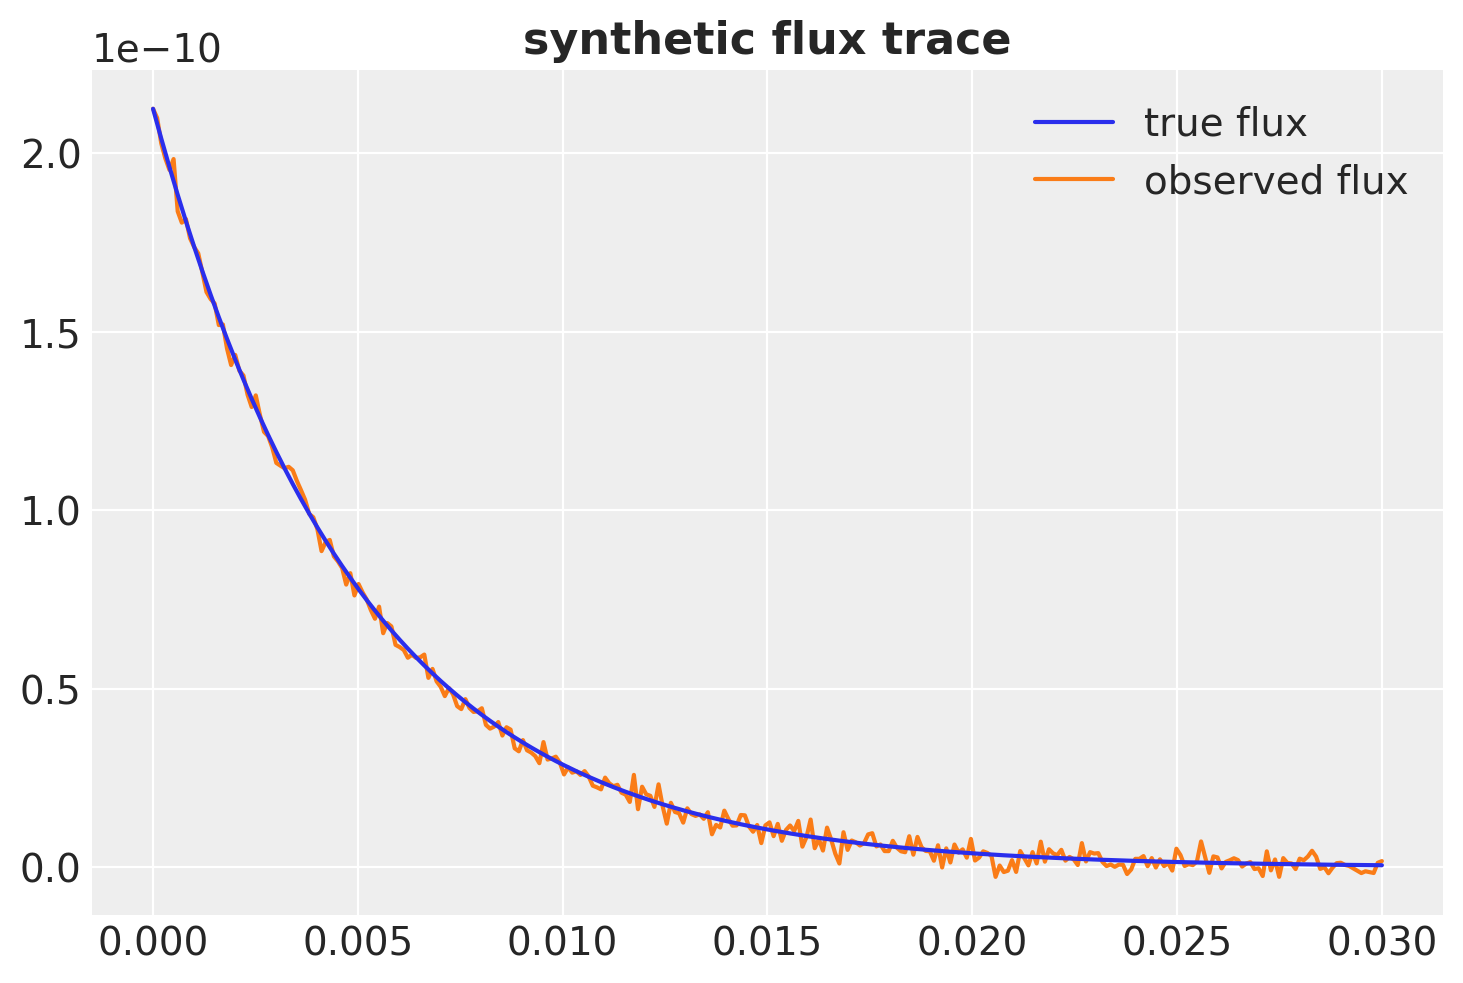

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_1]
>Metropolis: [theta_2]
>Metropolis: [theta_1]
Could not pickle model, sampling singlethreaded.
Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [sigma_1]
>Metropolis: [theta_2]
>Metropolis: [theta_1]
Sampling chain 3, 0 divergences: 100%|██████████| 6000/6000 [00:33<00:00, 176.93it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


            mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  ess_bulk  ess_tail  r_hat
theta_1  100.434  0.331   99.760  101.051      0.042    0.030      64.0    64.0      63.0     147.0   1.04
theta_2  100.904  0.468  100.146  101.924      0.061    0.043      59.0    59.0      59.0     127.0   1.04
sigma_1    0.000  0.000    0.000    0.000      0.000    0.000    1683.0  1683.0    1687.0    2087.0   1.00


In [30]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root
import arviz as az
import pymc3 as pm
import theano.tensor as tt
import tellurium as te


### Set display options
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')


# define a theano Op for our likelihood function
class LogLike(tt.Op):

    """
    Specify what type of object will be passed and returned to the Op when it is
    called. In our case we will be passing it a vector of values (the parameters
    that define our model) and returning a single "scalar" value (the
    log-likelihood)
    """

    itypes = [tt.dvector]  # expects a vector of parameter values when called
    otypes = [tt.dscalar]  # outputs a single scalar value (the log likelihood)

    def __init__(self, loglike, data):
        """
        Initialise the Op with various things that our log-likelihood function
        requires. Below are the things that are needed in this particular
        example.

        Parameters
        ----------
        loglike:
            The log-likelihood (or whatever) function we've defined
        data:
            The "observed" data that our log-likelihood function takes in
        """

        # add inputs as class attributes
        self.likelihood = loglike
        self.data = data

    def perform(self, node, inputs, outputs):
        # the method that is used when calling the Op
        (theta,) = inputs  # this will contain my variables

        # call the log-likelihood function
        logl = self.likelihood(self.data, theta)

        outputs[0][0] = np.array(logl)  # output the log-likelihood


# example model

antimony_str = '''
// Created by libAntimony v2.12.0
model *myModel()

  // Compartments and Species:
  compartment compartment_;
  species OF in compartment_, IF in compartment_;

  // Reactions:
  rxn1: OF -> IF; compartment_*(rxn1_k1*OF - rxn1_k2*IF);

  // Species initializations:
  OF = 4.25e-08;
  OF has substance_per_volume;
  IF = 2.125e-08;
  IF has substance_per_volume;

  // Compartment initializations:
  compartment_ = 0.0001;
  compartment_ has volume;

  // Variable initializations:
  rxn1_k1 = 100;
  rxn1_k2 = 100;
  
  // Other declarations:
  const compartment_, rxn1_k1, rxn1_k2;
  
  // Unit definitions:
  unit substance_per_volume = mole / litre;
  unit volume = litre;
  unit length = metre;
  unit area = metre^2;
  unit time_unit = second;
  unit substance = mole;
  unit extent = mole;

  // Display Names:
  time_unit is "time";
end
'''

m = te.loada(antimony_str)
m.integrator.absolute_tolerance = 1e-16
m.integrator.relative_tolerance = 1e-12
D = m.simulate(0,3e-2,300, selections=['time', 'rxn1'])

k1_true = 1e2
k2_true = 1e2
sd_true = 2e-12

y_true = D.T[1].copy()
y_obs = y_true + np.random.normal(loc=0.0, scale=sd_true, size=np.size(y_true))

plt.title('synthetic flux trace', fontweight='bold');
plt.plot(D.T[0], y_true, label='true flux');
plt.plot(D.T[0], y_obs, label='observed flux', zorder=1);
plt.legend()
plt.show()

def flux_model(k):
    '''single rxn network: OF <--> IF'''
    k1 = k[0]
    k2 = k[1]
    m.reset()
    m['rxn1_k1'] = k1
    m['rxn1_k2'] = k2
    D1 = m.simulate(0,3e-2,300, selections=['time', 'rxn1'])
    y_calc = D1.T[1]
    return y_calc
    
    
def log_likelihood(y_obs, theta):
    '''normal log_likelihood'''
    k = [theta[0], theta[1]]
    sigma = theta[2]
    y_pred = flux_model(k)
    logp = -len(y_obs) * np.log(np.sqrt(2.0 * np.pi) * sigma)
    logp += -np.sum((y_obs - y_pred) ** 2.0) / (2.0 * sigma ** 2.0)
    return logp
    
    
logl = LogLike(log_likelihood, y_obs)
ndraws = np.int(5e3)  # number of draws from the distribution
nburn = np.int(1e3)  # number of "burn-in points" (which we'll discard)

# use PyMC3 to sampler from log-likelihood
with pm.Model():
    theta1 = pm.Uniform("theta_1", lower=0, upper=500,  testval=150)
    theta2 = pm.Uniform("theta_2", lower=0, upper=500,  testval=150)
    sigma1 = pm.Uniform("sigma_1", lower=1e-12, upper=5e-12, testval=3e-12)

    # convert theta to a tensor vector
    theta = tt.as_tensor_variable([theta1, theta2, sigma1])
    pm.Potential("like", logl(theta))
    #pm.DensityDist("likelihood", lambda v: logl(v), observed={"v": theta})
    # Use simple metropolis
    step = pm.Metropolis()
    trace = pm.sample(ndraws, tune=nburn, step=step, discard_tuned_samples=True)
    print(pm.summary(trace).to_string())


/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

/Users/work/opt/anaconda3/envs/py_BPS21/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



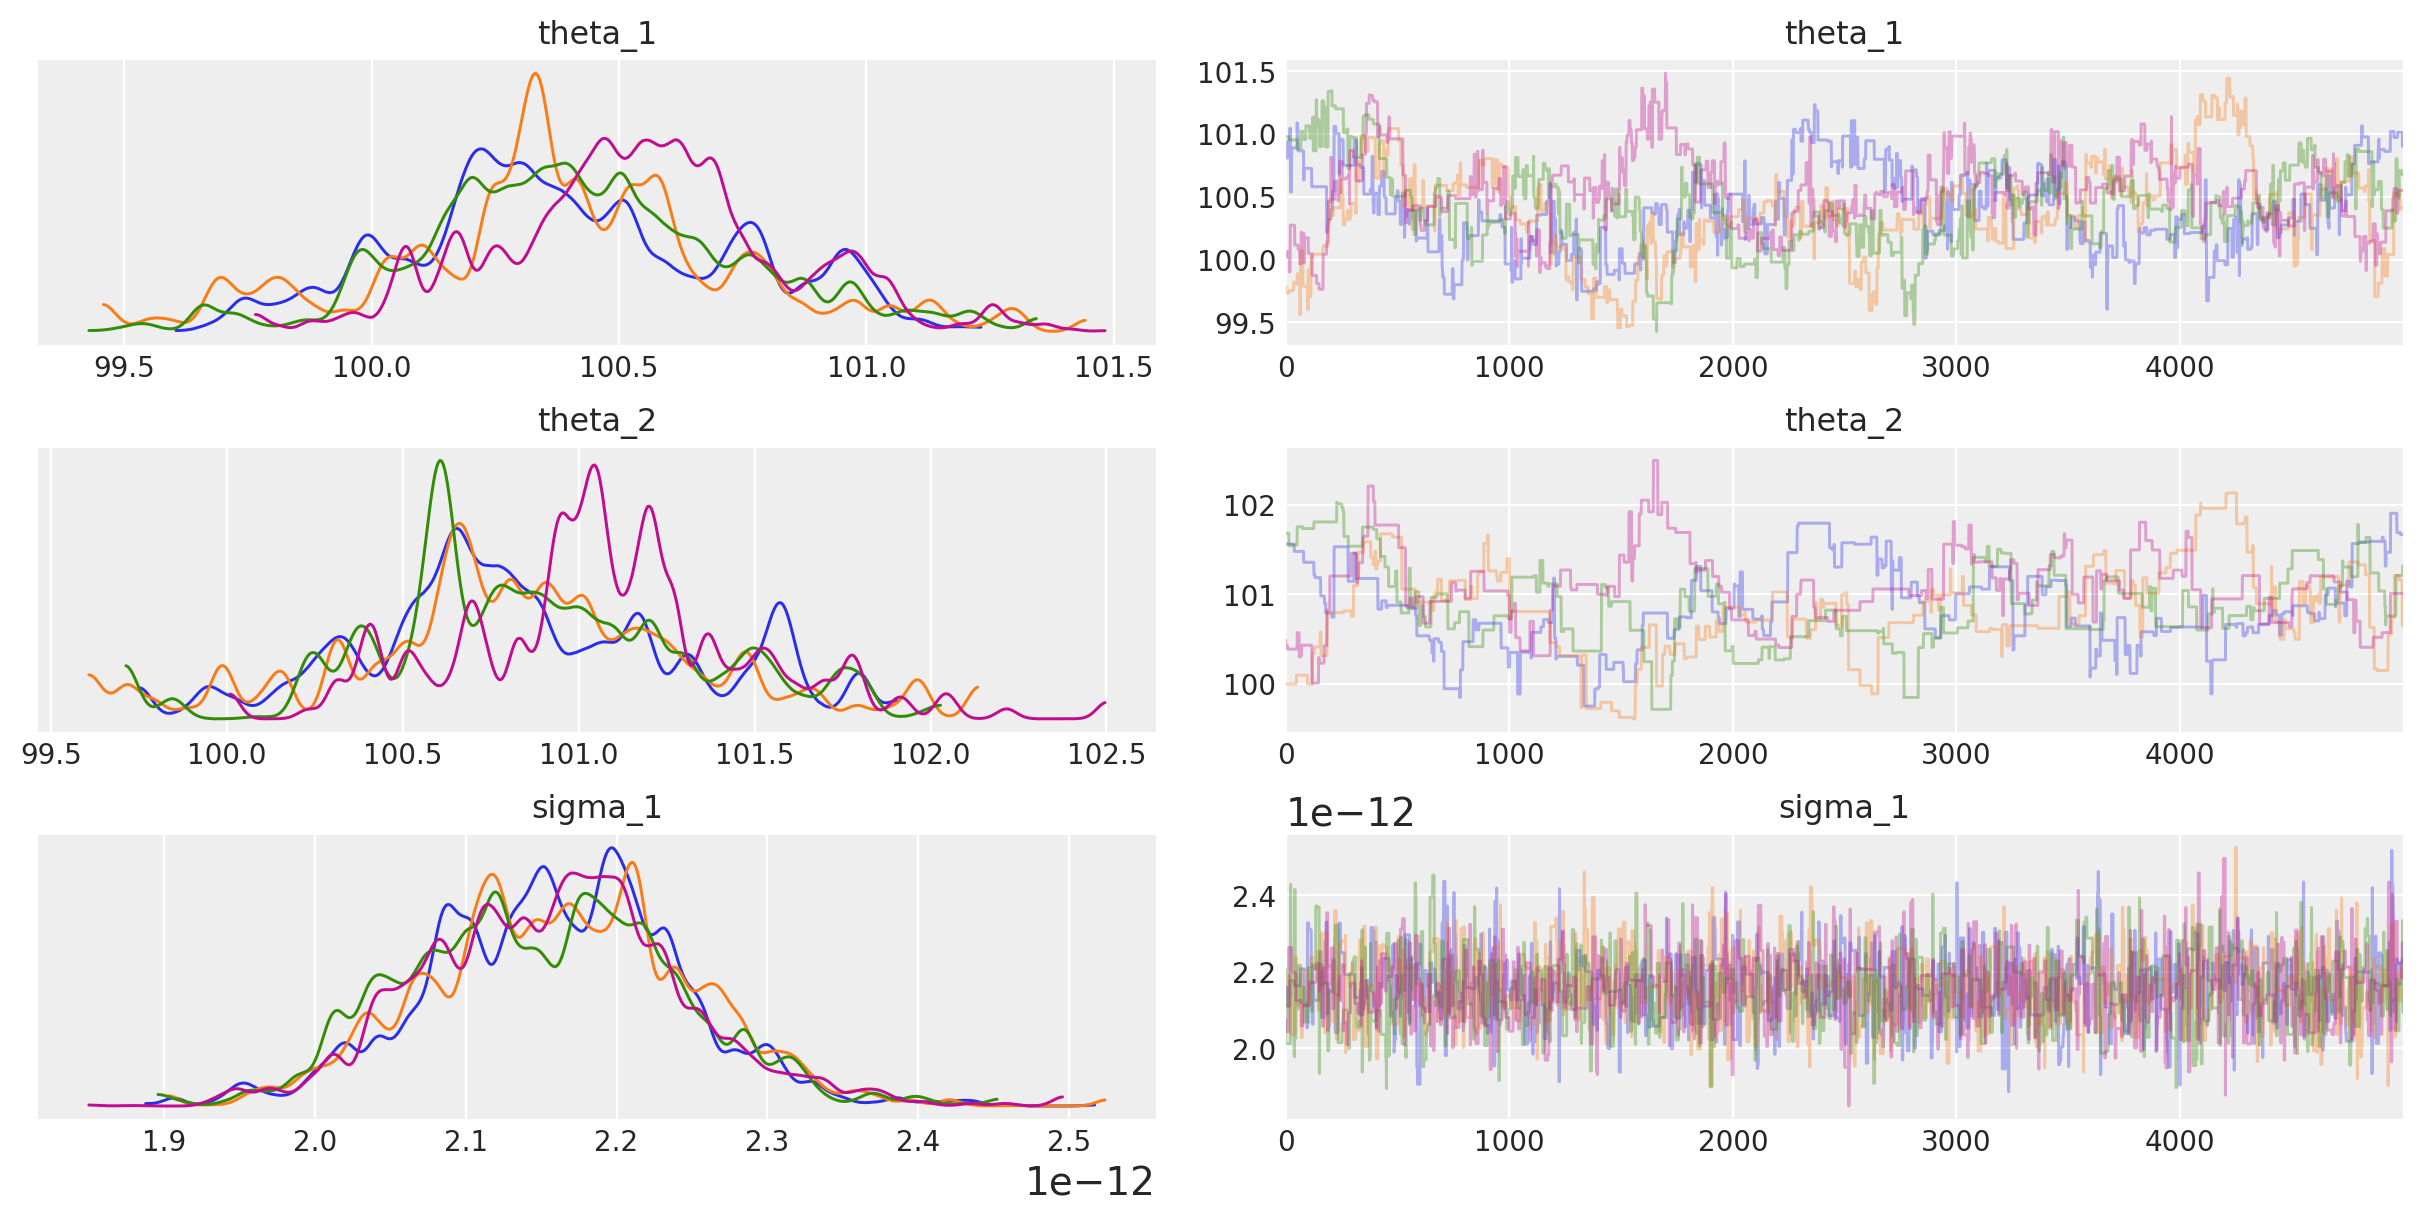

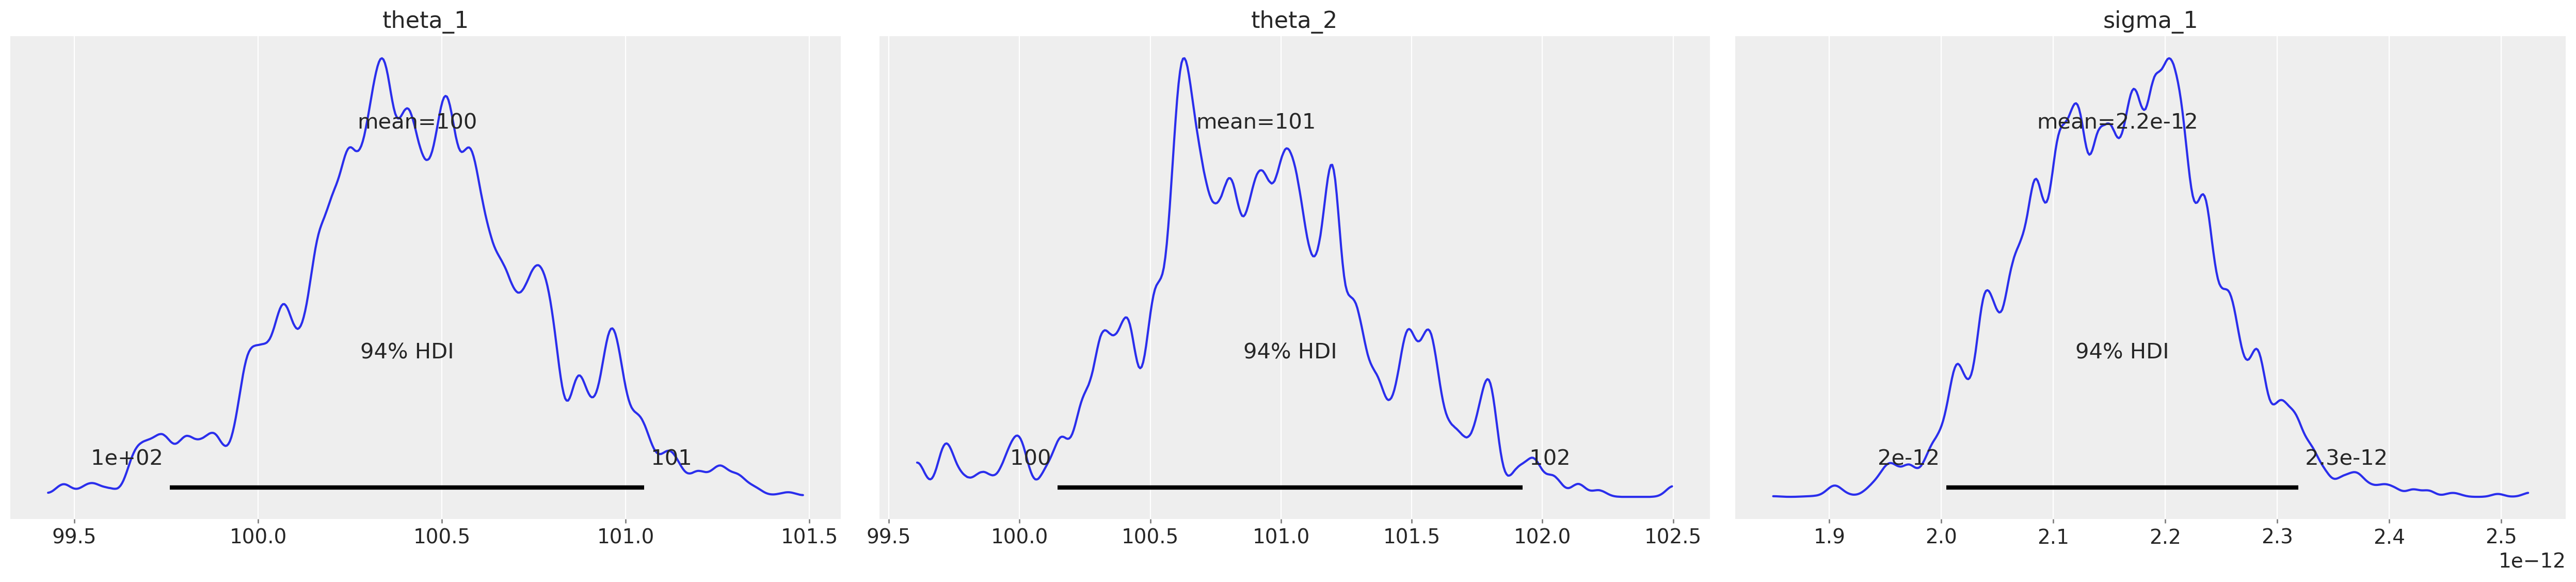

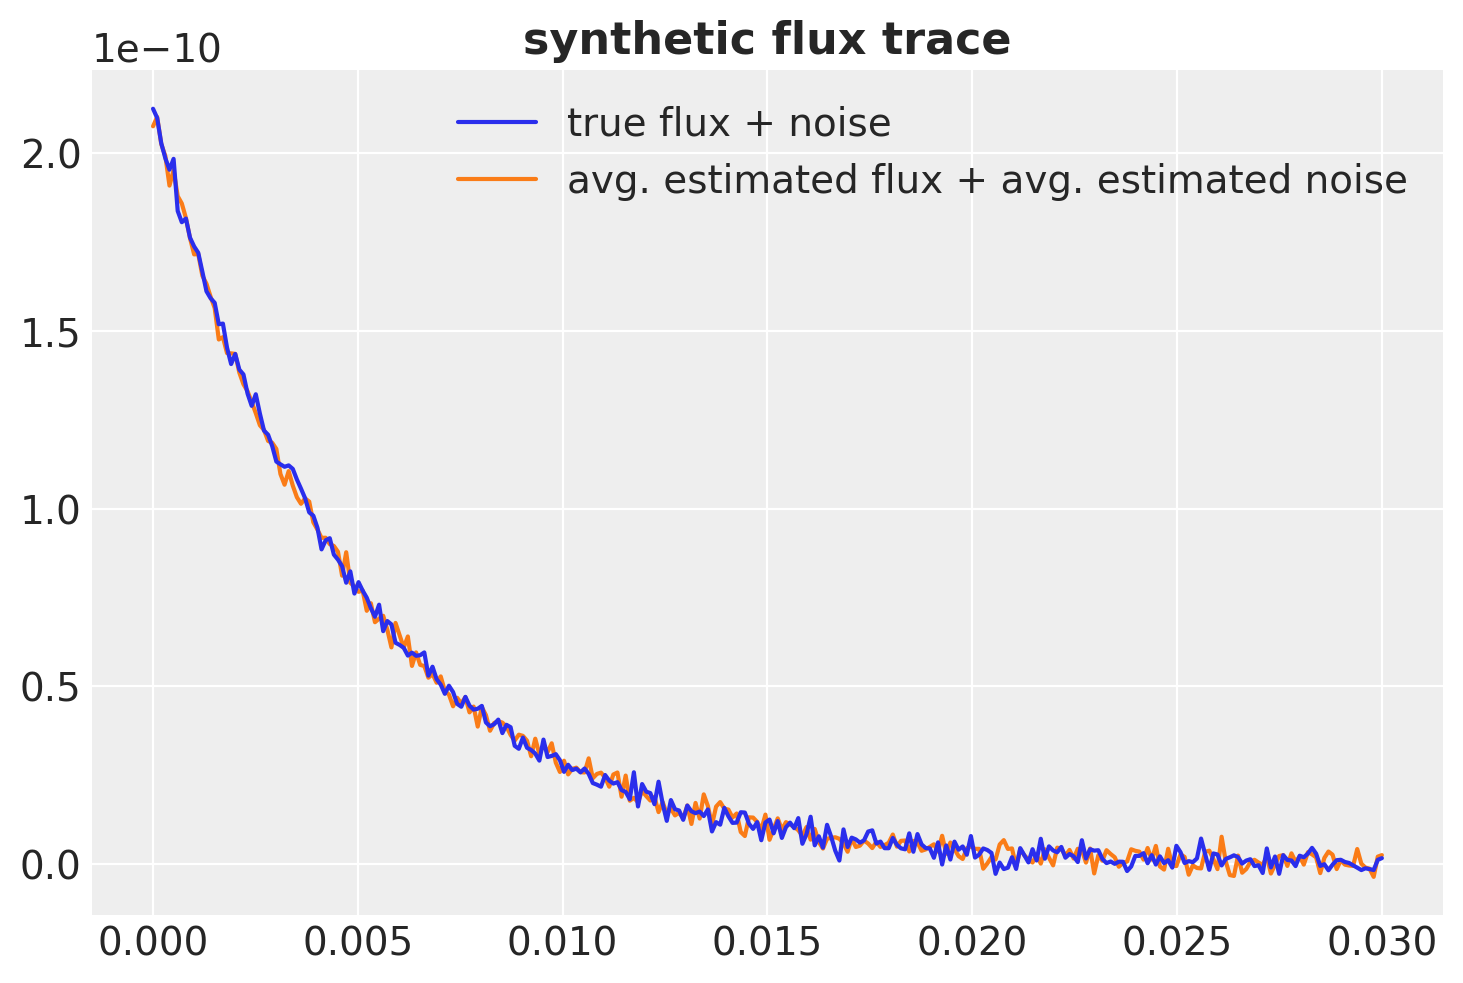

In [37]:
az.plot_trace(trace)
az.plot_posterior(trace)
plt.show()


flux_calc = flux_model([100,101])
flux_obs = flux_calc + np.random.normal(loc=0.0, scale=2.2e-12, size=np.size(y_true))
plt.title('synthetic flux trace', fontweight='bold');
#plt.plot(D.T[0], y_true, label='true flux', zorder=20);
plt.plot(D.T[0], y_obs, label='true flux + noise', zorder=10);
#plt.plot(D.T[0], flux_calc, label='avg. estimated flux', zorder=15);
plt.plot(D.T[0], flux_obs, label='avg. estimated flux + avg. estimated noise', zorder=5);

plt.legend()
plt.show()
